In [53]:
import numpy as np ;import pandas as pd 
import seaborn  as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from seedtools import load_seed

## CONTENTS : 
- Mathematical model
- Simple LR from scratch 
- sklearn model (for evaluation)

In [54]:
data  = load_seed("placement.csv").data
x_train,x_test,y_train,y_test = train_test_split(data['cgpa'],data['package'])
x_train =  np.array(x_train).reshape(-1,1)
y_train  =  np.array(y_train).reshape(-1,1)

Shape: [200, 2]
Columns: ['cgpa', 'package']
Description: Data Description is not yed provided


#### => Mathematical Model
***NOTE :  THIS IS DIRECT METHOD*** <br />
**We have used the loss function but mathematically it is MSE (mean squared error)**  <br />

$$ \hat{y} =  m*x_i + b $$
$$ \text{E(m,b)}  = \sum_{i=0}^{i=n} d_i^2 $$
$$d_i = (y_i -  \hat{y})$$
final loss function =>  $(y_i -  mx_i -b)^2$

***To find m =>***  $\frac{\partial E}{\partial m} = 0$ <br />

we get :  $ \boxed{b =  \bar{y} -  m\bar{x}}$


***To find b =>***  $\frac{\partial E}{\partial b} = 0$ <br />

 we get : $\boxed{m =  \frac{\sum_{i=1}^n(y_i - \bar{y})(x_i - \bar{x})}{\sum_{i=1}^n(x_i - \bar{x}^2)}}$






### Simple LR from scratch 


In [55]:
class simple_Lr:

    def fit(self,x,y):
        x_mean  =  np.mean(x)
        y_mean =  np.mean(y)
        num =0 
        den  = 0
        for i in range(x.shape[0]):
            num  =   num +  (x_mean -  x[i])*(y_mean - y[i])
            den =  den  + (x_mean -  x[i])**2
        self.m  =  num/den 
        self.b  = y_mean  - (self.m  * x_mean)
    def predict(self,x_test):
        return (self.m * x_test) +  self.b 
        
        

In [56]:
model = simple_Lr()
model.fit(x_train,y_train)
coef = model.m
bias = model.b
print(f"Coef : {coef[0]} | Bias : {bias[0]}")

Coef : 0.573280061881027 | Bias : -1.002595000851191


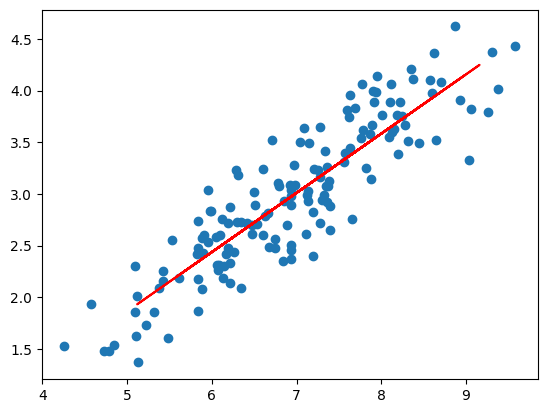

In [57]:
x_predict = model.predict(x_test)
plt.scatter(x_train,y_train)
plt.plot(x_test,x_predict,color='r')

### SkLearn Model 

In [58]:
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
x_test  =  np.array(x_test).reshape(-1,1)

In [59]:
ori_m  = LinearRegression()
ori_m.fit(x_train,y_train)

coef = ori_m.coef_
bias = ori_m.intercept_
print(f"Coef : {coef[0]} | Bias : {bias[0]}")

Coef : [0.57328006] | Bias : -1.0025950008511888


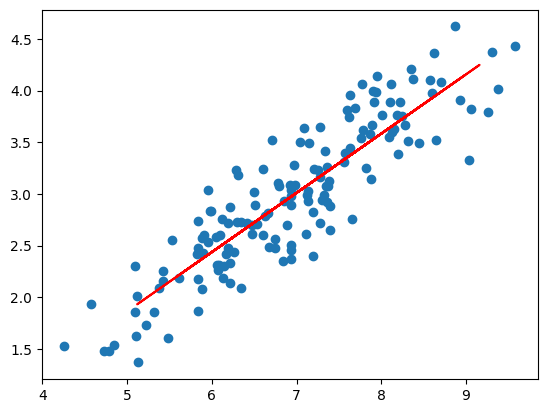

In [60]:

x_predicted_ori =  ori_m.predict(x_test)
plt.scatter(x_train,y_train)
plt.plot(x_test,x_predicted_ori,color='r')